Sales Analysis

In [84]:
# import necessary libraries

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns 
import calendar

Merging all files into one file

In [9]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./Sales_Data/")]
all_data = pd.DataFrame()
for file  in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

all_data.to_csv("final_data.csv", index=False)

In [10]:
all_data = pd.read_csv("final_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,,,,,,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Get month and time details

In [20]:
all_data.columns = all_data.columns.str.strip()
time_info = all_data['Order Date'].str.split(' ', expand=True)
all_data['Date'] = time_info[0]
all_data['Time'] = time_info[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,08:46
1,,,,,,NaN,,
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38


In [21]:
all_data.drop(columns=['Order Date'], inplace=True)

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,04
1,,,,,NaN,,,
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,04
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,04
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,04


Clean up of Data

In [23]:
all_data['Month'] = all_data['Date'].str[0:2]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,04
1,,,,,NaN,,,
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,04
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,04
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,04


In [34]:
nan_count = all_data['Month'].isna().sum()
print(nan_count)

0


In [36]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
1,,,,,NaN,,,
356,,,,,NaN,,,
735,,,,,NaN,,,
1433,,,,,NaN,,,
1553,,,,,NaN,,,


In [50]:
unique_values = all_data['Month'].unique()
print(unique_values)

['04' '05' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [51]:
rows_with_or = all_data[all_data['Month'] == 'Or']
all_data = all_data[all_data['Month'] != 'Or']
all_data = all_data[all_data['Month'] != '']
all_data['Month'] = all_data['Month'].astype('int32')


In [56]:
all_data.to_csv('all_data.csv')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Purchase Address  185950 non-null  object 
 5   Date              185950 non-null  object 
 6   Time              185950 non-null  object 
 7   Month             185950 non-null  int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 12.1+ MB


In [58]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')

In [60]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,4,99.99
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,600.00
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,4,11.99
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99


Question 1: What was the best month? How much earned that month?

In [88]:
result = all_data.groupby('Month').sum()

C:\Users\shrey\AppData\Local\Temp\ipykernel_1564\4257767953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_names, y=result['Sales'], palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

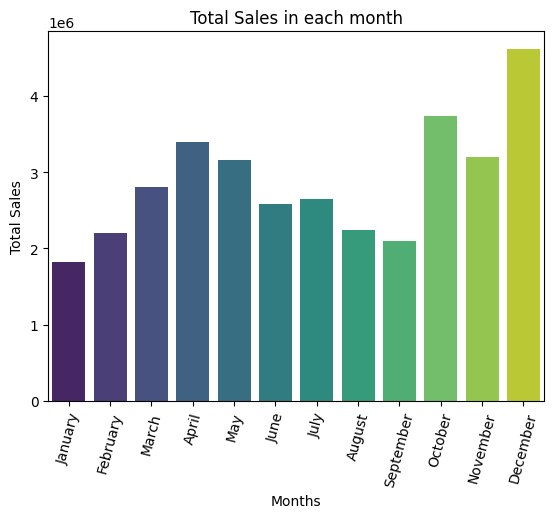

In [91]:
month_names = [calendar.month_name[i] for i in range(1, 13)]
sns.barplot(x=month_names, y=result['Sales'], palette='viridis')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Total Sales in each month')
plt.xticks(rotation=75)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 [Text(0.0, 0, 'January'),
  Text(1.0, 0, 'February'),
  Text(2.0, 0, 'March'),
  Text(3.0, 0, 'April'),
  Text(4.0, 0, 'May'),
  Text(5.0, 0, 'June'),
  Text(6.0, 0, 'July'),
  Text(7.0, 0, 'August'),
  Text(8.0, 0, 'September'),
  Text(9.0, 0, 'October'),
  Text(10.0, 0, 'November'),
  Text(11.0, 0, 'December')])

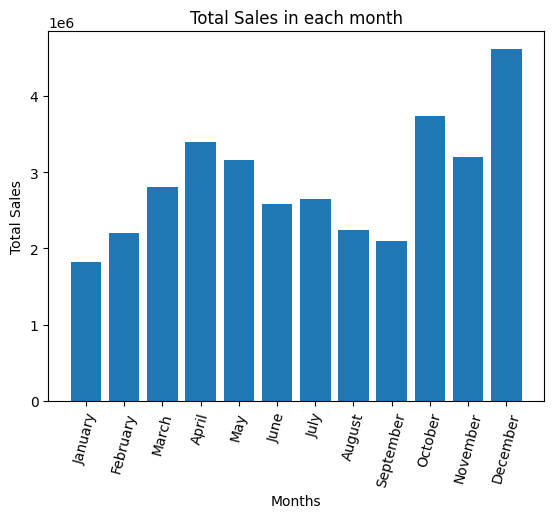

In [92]:
plt.bar(month_names, result['Sales'])
plt.xticks(month_names)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Total Sales in each month')
plt.xticks(rotation=75)

In [93]:
print(result['Sales'])

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64
